In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
names = [
"WSR0","WSR1","WSR2","WSR3",
"WSR4","WSR5","WSR6","WSR7","WSR8",
"WSR9","WSR10","WSR11","WSR12","WSR13",
"WSR14","WSR15","WSR16","WSR17","WSR18",
"WSR19","WSR20","WSR21","WSR22","WSR23",
"WSR_PK","WSR_AV","T0","T1","T2",
"T3","T4","T5","T6","T7","T8",
"T9","T10","T11","T12","T13","T14","T15",
"T16","T17","T18","T19","T20","T21",
"T22","T23","T_PK","T_AV","T85","RH85",
"U85","V85","HT85","T70","RH70",
"U70","V70","HT70","T50","RH50","U50",
"V50","HT50","KI","TT","SLP",
"SLP_","Precp", "O3"]

In [3]:
df = pd.read_csv("ozone+level+detection/onehr.data", names=names)
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,O3
1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 1/1/1998 to 12/31/2004
Data columns (total 73 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WSR0    2536 non-null   object 
 1   WSR1    2536 non-null   object 
 2   WSR2    2536 non-null   object 
 3   WSR3    2536 non-null   object 
 4   WSR4    2536 non-null   object 
 5   WSR5    2536 non-null   object 
 6   WSR6    2536 non-null   object 
 7   WSR7    2536 non-null   object 
 8   WSR8    2536 non-null   object 
 9   WSR9    2536 non-null   object 
 10  WSR10   2536 non-null   object 
 11  WSR11   2536 non-null   object 
 12  WSR12   2536 non-null   object 
 13  WSR13   2536 non-null   object 
 14  WSR14   2536 non-null   object 
 15  WSR15   2536 non-null   object 
 16  WSR16   2536 non-null   object 
 17  WSR17   2536 non-null   object 
 18  WSR18   2536 non-null   object 
 19  WSR19   2536 non-null   object 
 20  WSR20   2536 non-null   object 
 21  WSR21   2536 non-null   objec

In [5]:
df.index = pd.to_datetime(df.index)
for i in df.columns:
    df[i][df[i] =="?"] = np.nan
    df[i] = pd.to_numeric(df[i])
    df[i] = df[i].fillna(method="ffill")

C:\Users\leous\AppData\Local\Temp\ipykernel_10720\2336796927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i] =="?"] = np.nan
C:\Users\leous\AppData\Local\Temp\ipykernel_10720\2336796927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i] =="?"] = np.nan
C:\Users\leous\AppData\Local\Temp\ipykernel_10720\2336796927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i] =="?"] = np.nan
C:\Users\leous\A

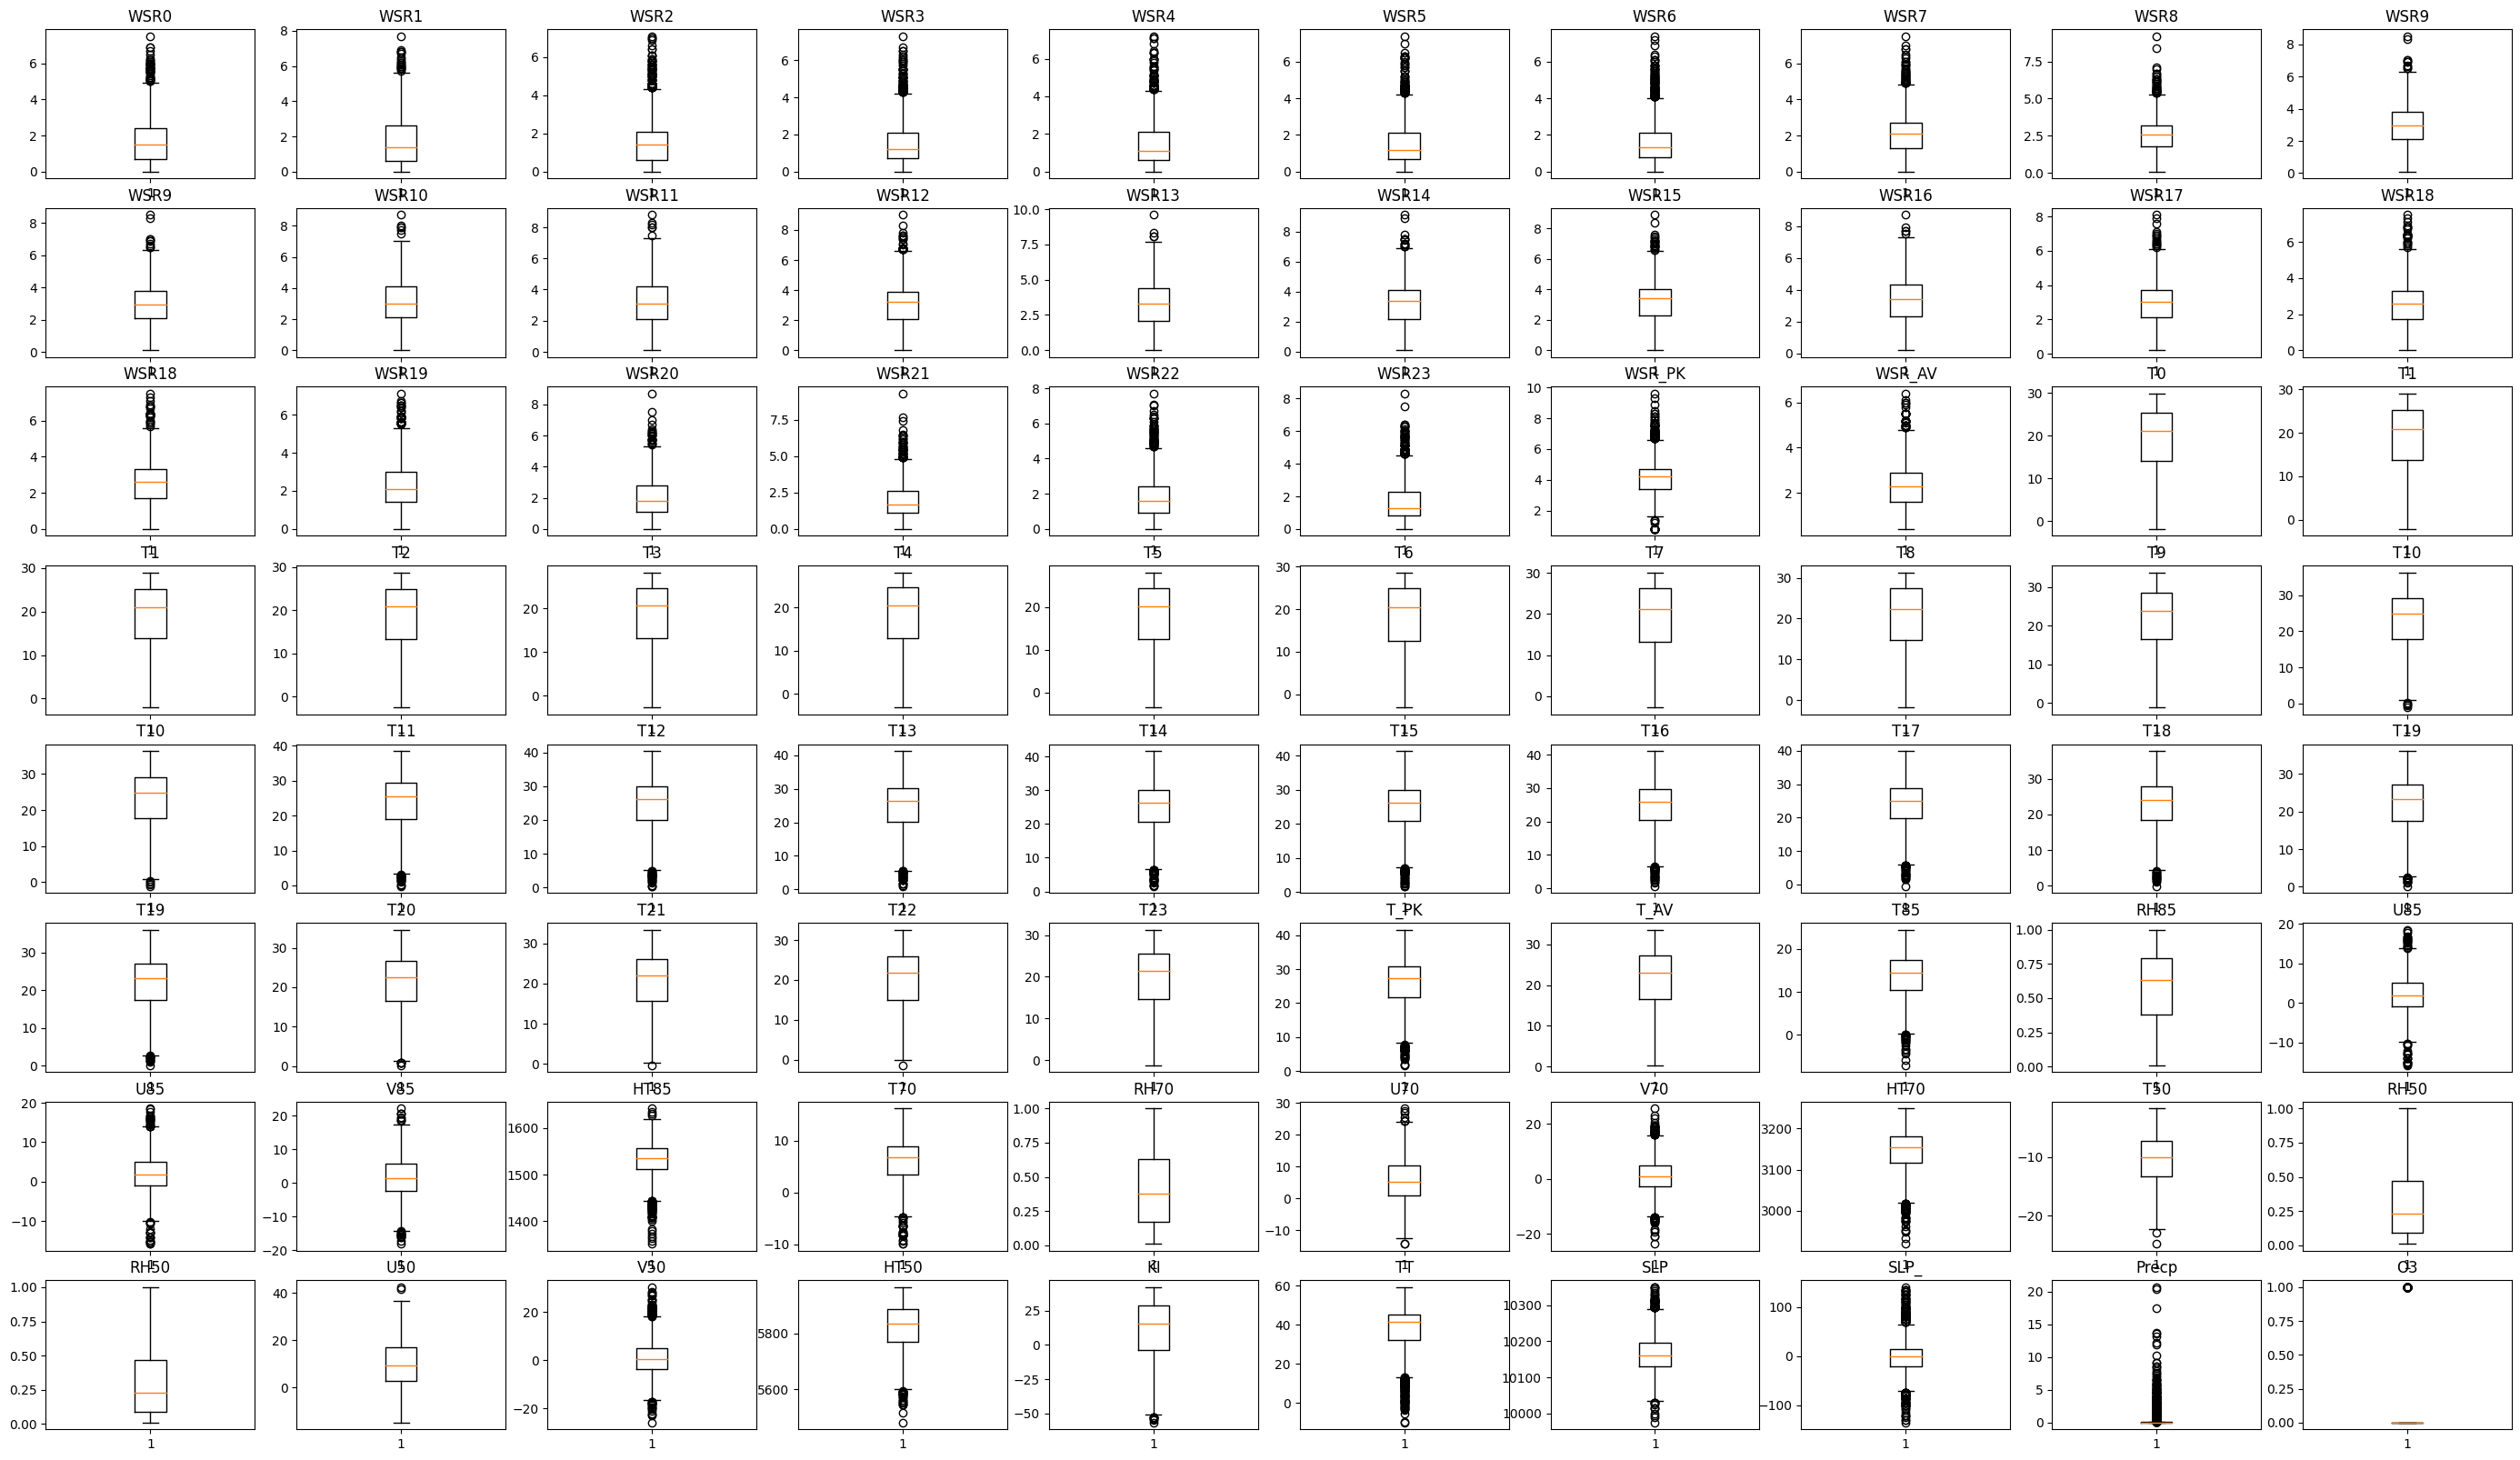

In [6]:
fig, axes = plt.subplots(8, 10)
fig.set_figheight(20)
fig.set_figwidth(35)
for i in range(8):
    for j in range(10):
        col = df.columns[i*9+j]
        axes[i][j].boxplot(df[col])
        axes[i][j].set_title(col)

<Axes: >

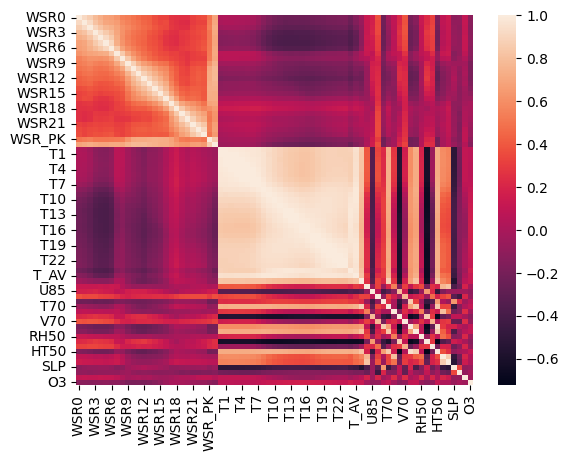

In [7]:
sns.heatmap(df.corr())

In [8]:
from sklearn import preprocessing

x = preprocessing.normalize(df[names[:-1]].copy())
y = df[names[-1]].copy()


l = 0.85 # Порог отсечения для предсказания
x_train = x[:round(len(x)*0.85)]
y_train = y[:round(len(y)*0.85)]

x_test = x[round(len(x)*0.85):]
y_test = y[round(len(y)*0.85):]

# print(len(x_train), len(x_test))
# y_train.value_counts()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'val samples')
print('y_train shape:', y_train.shape)


x_train shape: (2156, 72)
2156 train samples
380 val samples
y_train shape: (2156,)


In [9]:
x_train.shape[1:]

(72,)

In [10]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, LeakyReLU, PReLU
import keras.layers as layers


In [11]:
prev_day = keras.Input(shape=x_train.shape[1:], name='prev_day')
today = keras.Input(shape=x_train.shape[1:], name='today')

l1 = layers.Dense(64, activation="relu")(prev_day)
# l1 = layers.BatchNormalization()(l1)
l2 = layers.Dense(64, activation="relu")(today)
# l2 = layers.BatchNormalization()(l2)


x = layers.concatenate([l1,l2])
score_output = layers.Dense(1, activation="softmax")(x)
model = keras.Model(inputs=[prev_day, today],
                    outputs=[score_output])
opt = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


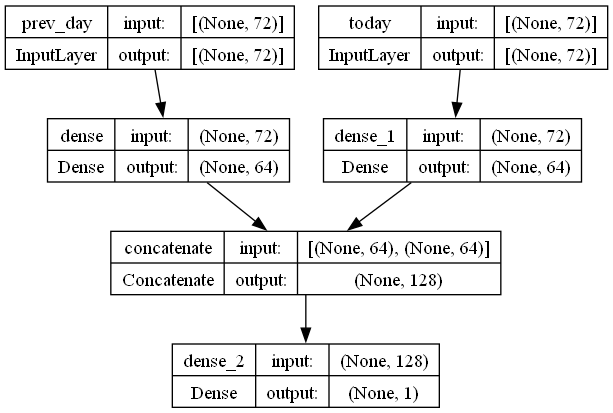

In [12]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)  # Нарисуем схему полученной модели

In [13]:
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output

class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.inter_dim = []
        self.val_inter_dim = []
        self.logits = []
        self.val_logits = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        self.i += 1
        f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        clear_output(wait=True)

        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss:" +
                 str(round(logs.get('loss'), 2)))
        ax1.plot(self.x, self.val_losses, label="v_loss:" +
                 str(round(logs.get('val_loss'), 2)))
        ax1.legend()

        ax2.plot(self.x, self.acc, label="acc:" +
                 str(round(logs.get('accuracy'), 2)))
        ax2.plot(self.x, self.val_acc, label="v_acc:" +
                 str(round(logs.get('val_accuracy'), 2)))
        ax2.legend()

        plt.savefig("fig")
        plt.show()
plot = PlotLearning()


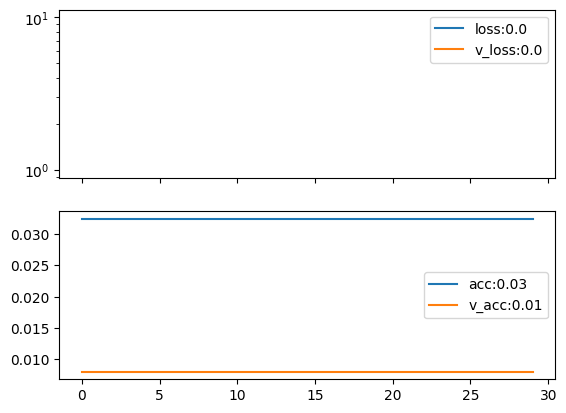

1078/1078 [==============================] - 2s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0325 - val_loss: 0.0000e+00 - val_accuracy: 0.0079


In [14]:
batch_size = 2
epochs = 30
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

model.fit([x_train[:-1], x_train[1:]], y_train[1:],
          batch_size=batch_size,
          epochs=epochs,
          validation_data=([x_test[:-1], x_test[1:]], y_test[1:]),
          callbacks=[plot]
          )

Эффективность такого подхода "в лоб" почти нулевая